# 10. Gyakorlat - 2 DoF nemlineáris rendszer
2021.04.16.

## Feladat:

<center><img src="gyak10_1.png" width=400/></center>

A mellékelt ábrán egy két szabadságfokú mechanikai lengőrendszer látható, mely egy $m_1$ tömegű és $r$ sugarú  korongból áll, ami egy $R$ belső sugarú mozgó felületen gördül. Ez az $m_2$ tömeg a $k_1$, $k_2$ és $k_3$ rugómerevségű rugók által van alátámasztva. Ennek vízszintes irányú elmozdulását az $y$ általánosított koordináta írja le, valamint a gördülő korong pozíciójának leírására a $\varphi$ általános koordináta használatos. A gravitációs mezőben elhelyezett rendszer egyensúlyi állapota az $y = 0$ és a $\varphi = 0$ állapothoz tartozik. Itt egyedül a rúgókat terheli statikus deformáció. 
### Adatok:
Az $m_1$ és $m_2$ tömegek, az $r$ és $R$ sugarak, valamint a $k_1$, $k_2$, $k_3$ rugómerevségek ismertnek tekinthetőek.
### Részfeladatok:

1. Határozza meg a rendszer nemlineáris mozgásegyenleteit a másodfajú Lagrange-egyenlettel, továbbá linearizálja az $y = 0$ és $\varphi = 0$ egyensúlyi helyzet körüli kis kitérések mellett.
2. Határozza meg a linearizált mozgásegyenleteket mátrix együtthatós alakban is.

## Megoldás:

### 1. Feladat

In [1]:
import sympy as sp
from IPython.display import Math
sp.init_printing()
# a két általános koordináta felvétele

t = sp.Symbol('t')
y = sp.Function('y')(t)
φ = sp.Function('φ')(t)

m1, m2, r, R, k1, k2, k3, g = sp.symbols('m_1, m_2, r, R, k_1, k_2, k_3, g')
# Tároljuk ezeket a `q` általánosított koord. vektorban
q = sp.Matrix([[y],[φ]]) # a második réteg szögletes zárójel nem kötelező itt
display(Math('\mathbf{{q}} = {}'.format(sp.latex(q))))

# Figyeljünk rá, hogy mostantól `y` `q[0]` lesz, `φ` pedig `q[1]`.

<IPython.core.display.Math object>

A kinetikus energia meghatározása:

$$T = \frac{1}{2}m_2\dot{y}^2 + \frac{1}{2}m_1v_{\mathrm{S}}^2 + \frac{1}{2}\Theta_{\mathrm{1Sz}}\omega_{\mathrm{1z}}^2$$

In [2]:
""" A kinetikus energiát az általánosított koordinákkal kell felírni, 
így `v_S` és `ω_1z`-t azok segítségével kell kifejezni. 
"""

# egy kis LaTeX-es formázás: a vektort félkövérrel íratjuk ki (bold font)
# valamint az index álló betű legyen (roman).
v_O = sp.MatrixSymbol('\mathbf{v}_\mathrm{O}',3,1) # Hasonló, mint az `sp.Symbol`, csak jelen esetben 
                                                   # 3x1-es mátrixként kezeli. Így összeadható
                                                   # szimbolikusan egy megfelelő dimenziójú mátrixszal.
v_S = sp.MatrixSymbol('\mathbf{v}_\mathrm{S}',3,1)
r_OSx,r_OSy = sp.symbols('\mathbf{r}_{\mathrm{OS}z},\mathbf{r}_{\mathrm{OS}y}')
r_OS = sp.Matrix([[r_OSx],[r_OSy],[0]])
v_OS_red = v_O + sp.Matrix([[0],[0],[q[1].diff(t)]]).cross(r_OS)
eq_vos = sp.Eq(v_S,v_OS_red)
eq_vos

                        ⎡                           d       ⎤                 
                        ⎢-\mathbf{r}_{\mathrm{OS}y}⋅──(φ(t))⎥                 
                        ⎢                           dt      ⎥                 
                        ⎢                                   ⎥                 
\mathbf{v}_\mathrm{S} = ⎢                          d        ⎥ + \mathbf{v}_\ma
                        ⎢\mathbf{r}_{\mathrm{OS}z}⋅──(φ(t)) ⎥                 
                        ⎢                          dt       ⎥                 
                        ⎢                                   ⎥                 
                        ⎣                 0                 ⎦                 

       
       
       
       
thrm{O}
       
       
       
       

In [3]:
""" Sajnos a mátrix szimbólumos út nem járható 
a jelenlegi `sympy` verzió mellett (1.7.1). 
Remélhetőleg a jövőben jobban ki lesz dolgozva 
ez a megközelítés is. Az egyik legfőbb hiányosságot
az alábbi kódsor szemlélteti:
"""
sp.solve(eq_vos,v_O) # Azaz egyszerűen fejezzük ki a `v_O` vektort.

""" Látható, hogy hibát kapunk. A `sympy solve` 
metódusa nincs felkészítve a mátrix szimbólumokkal
való számolásra. Ez is jól mutatja, hogy a `sympy` 
közel sem tökéletes modul, bár folyamatosan fejlesztik.
Remélhetőleg egy jövőbeli verzióba belekerül ez a funkció is.
"""

AttributeError: 'Dummy' object has no attribute 'as_coeff_mmul'

In [4]:
# Most tehát minden szimbolikus vektort/mátrixot a benne lévő elemek
# szimbolikussá tételével fogunk kezelni

v_Sx, v_Sy = sp.symbols('v_{\mathrm{S}x}, v_{\mathrm{S}y}')
v_Ox, v_Oy = sp.symbols('v_{\mathrm{O}x}, v_{\mathrm{O}y}')
v_Bx, v_By = sp.symbols('v_{\mathrm{B}x}, v_{\mathrm{B}y}')
r_OSx, r_OSy = sp.symbols('r_{\mathrm{OS}x}, r_{\mathrm{OS}y}')
r_BSx, r_BSy = sp.symbols('r_{\mathrm{BS}x}, r_{\mathrm{BS}y}')
ω_1z = sp.Symbol('ω_1z')

v_S = sp.Matrix([[v_Sx],[v_Sy],[0]])
v_O = sp.Matrix([[v_Ox],[v_Oy],[0]])
v_B = sp.Matrix([[v_Bx],[v_By],[0]])
r_OS = sp.Matrix([[r_OSx],[r_OSy],[0]])
r_BS = sp.Matrix([[r_BSx],[r_BSy],[0]])

2 sebességredukciós képlet segítségével számíthatjuk ki a megfelelő sebességeket a kinetikus energia kifejezésében, valamint ezek felhasználásával határozhatjuk meg a kapcsolatot az általános koordináták és ezen sebességek között. Az ábra alapján:


$$\mathbf{v}_\mathrm{S} = \mathbf{v}_\mathrm{O} + \begin{bmatrix}0 \\ 0 \\ \dot\varphi\end{bmatrix} \times \mathbf{r}_\mathrm{OS},$$ valamint 
$$\mathbf{v}_\mathrm{S} = \mathbf{v}_\mathrm{B} + \begin{bmatrix}0 \\ 0 \\ \omega_{1z}\end{bmatrix} \times \mathbf{r}_\mathrm{BS}.$$

Megállapítható továbbá, hogy 

$$\mathbf{v}_\mathrm{O} = \mathbf{v}_\mathrm{B} = \begin{bmatrix}0 \\ \dot{y} \\ 0\end{bmatrix}.$$

In [5]:
v_OS_red = sp.Matrix([[0],[q[0].diff(t)],[0]]) + sp.Matrix([[0],[0],[q[1].diff(t)]]).cross(r_OS)

v_BS_red = sp.Matrix([[0],[q[0].diff(t)],[0]]) + sp.Matrix([[0],[0],[ω_1z]]).cross(r_BS)

# A helyvektorok koordinátái az ábráról leolvashatóak:
vekt_koord = [(r_OSx, (R-r) * sp.sin(q[1])), (r_OSy,  -(R-r) * sp.cos(q[1])),
              (r_BSx, -r*sp.sin(q[1])), (r_BSy, r*sp.cos(q[1]))]

# A fentiek alapján az alábbi egyenlőség áll fenn:
sp.Eq(v_OS_red.subs(vekt_koord),v_BS_red.subs(vekt_koord))

⎡                        d            ⎤                                 
⎢    -(-R + r)⋅cos(φ(t))⋅──(φ(t))     ⎥   ⎡     -r⋅ω_1z⋅cos(φ(t))      ⎤
⎢                        dt           ⎥   ⎢                            ⎥
⎢                                     ⎥   ⎢                    d       ⎥
⎢                  d          d       ⎥ = ⎢-r⋅ω_1z⋅sin(φ(t)) + ──(y(t))⎥
⎢(R - r)⋅sin(φ(t))⋅──(φ(t)) + ──(y(t))⎥   ⎢                    dt      ⎥
⎢                  dt         dt      ⎥   ⎢                            ⎥
⎢                                     ⎥   ⎣             0              ⎦
⎣                  0                  ⎦                                 

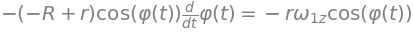

<IPython.core.display.Math object>

In [6]:
# Fejezzük ki `ω_1z` és `φ.diff(t)` közötti kapcsolatot, felhasználva
# (pl.) az x komponensek egyenlőségét:

tmp = sp.Eq(v_OS_red.subs(vekt_koord)[0],v_BS_red.subs(vekt_koord)[0])
display(tmp)

ω_1z_expr = sp.solve(tmp, ω_1z)[0]

display(Math('ω_{{1z}} = {}'.format(sp.latex(ω_1z_expr))))

In [7]:
# Ezt felhasználva a B és S pontok közötti sebességred. képletből:
v_S_expr = v_BS_red.subs(vekt_koord).subs(ω_1z,ω_1z_expr)
display(Math('\mathbf{{v}}_\mathrm{{S}} = {}'.format(sp.latex(v_S_expr))))

# Mostmár felírható a kinetikus energia az általánosított
# koordináták segítségével

Θ_1Sz = sp.Rational(1,2)*m1*r**2
T = (sp.Rational(1,2)*m2 * q[0].diff(t)**2 
     + sp.Rational(1,2)*m1 * v_S_expr.dot(v_S_expr)
     + sp.Rational(1,2)*Θ_1Sz * ω_1z_expr**2)

<IPython.core.display.Math object>

In [8]:
## A potenciális energia

"""A potenciális energia a rugókban felhalmozódó potenciális energia
és a gravitációs erő potenciális energiájából tevődik össze.
Mivel a rugó előterhelt állapotban van az egyensúlyi pozícióban, ezért
célszerű a potenciális energiának bevezetni egy új koordináta rendszert,
aminek a függőleges nullpontja ott van, ahol a rugó hossza megegyegyzik
a terheletlen hosszával. Ezzel a transzformációval 
az új koordináta-rendszerben a nullszinttől való eltérést a z koordináta méri."""

z_st = sp.symbols("z_st")
z = q[0] - z_st

ke = k1 + k2 + k3
U = sp.Rational(1,2)*ke*z**2 + m1*g*(z+r_OSy) + m2*g*z

# Fejezzük ki a statikus deformációt az egyensúlyi egyenletből:

e_egy = sp.Eq((m1 + m2)*g, ke*z_st) # azaz egyensúlyban `(m1 + m2)*g = ke*z_st`
z_st_expr = sp.solve(e_egy,z_st)[0]

# Írjuk vissza U-ba:
U = U.subs(z_st,z_st_expr).subs(vekt_koord)

In [9]:
# Minden adott a Lagrange-egyenletben; írjuk fel a mozgásegyenleteket

eom_y = T.diff(q[0].diff(t)).diff(t) - T.diff(q[0]) + U.diff(q[0]) # `y`-hoz tartozó
eom_φ = T.diff(q[1].diff(t)).diff(t) - T.diff(q[1]) + U.diff(q[1]) # `φ`-hez tartozó
eom_φ = eom_φ.simplify()
eom_y = eom_y.simplify()

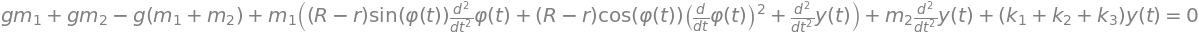

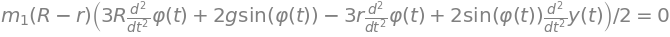

In [10]:
display(sp.Eq(eom_y,0),sp.Eq(eom_φ,0))

In [11]:
"""A linearizáláshoz írjuk fel az egyensúlyi helyzet körüli Taylor sorfejtéshez
tartózó Taylor polinomot az elsőfokú tagig. Ehhez a `sympy` `sp.series` metódusa
használható. Demonstráció: linearizáljuk a `sin(a(t))` függvényt `a(t) = 0` körül.""" 

a = sp.Function('a')(t)
a_sym = sp.Symbol('a_sym')
expr = sp.sin(a)

""" Jelen helyzetben `a` `t`-nek a függvénye, így a `sympy` nem szimbólumként kezeli.
Létre kell hozni egy átmeneti szimbólumot, amire kicseréljük a függvényünket. Ez csak
formaiság. A `sp.series` az argumentumába először egy függvényt vár (itt történik az említett csere),
majd várja a függvény argumentumát. Ezt követően meg kell adni, hogy mely pont körül fejtünk 
sorba (itt a_sym = 0), valamint hogy hanyadrendig szeretnénk megtenni a sorfejtést."""

a_lin_sym = sp.series(expr.subs(a,a_sym),a_sym,0,2)

# Alternatív függvény hívás:
expr.subs(a,a_sym).series(a_sym,0,2) # azaz közvetlenül a `sympy` objektumra

In [12]:
"""A magasabb rendű tagokat a `.removeO()` metódussal hagyhatjuk el (figyelem, nem .remove0()!),
majd cseréljük vissza a szimbólumot a függvényünkre:"""

a_lin = a_lin_sym.removeO().subs(a_sym,a)
a_lin

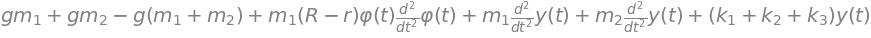

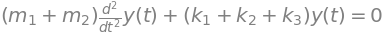

In [13]:
"""Linearizáljuk a mozgásegyenletetek bal oldalát (mint függvényeket), a 
q(t) = 0, és q.diff(t) = 0 egyensúlyi helyzet körül. Arra kell itt figyelni, hogy az ált. koordináták
deriváltjait külön változóként kell kezelni.""" 

# Cseréljük ki a deriváltakat szimbólumokra. Fontos, hogy a legmagasabb rendű deriválttal
# kezdjünk, mert ha pl. az első deriválttal kezdünk, a második deriváltat is kicseréli annak a deriváltjára.
φ, dφ, ddφ = sp.symbols('φ, dφ, ddφ')
φ_csere = [(q[1].diff(t,2),ddφ),(q[1].diff(t),dφ),(q[1],φ)]
φ_csere_vissza = [(elem[1], elem[0]) for elem in φ_csere] # hasznos lesz, ha a vissza kell cserélni

eom1_csere = eom_y.subs(φ_csere)

eom1_taylor = eom1_csere.series(dφ,0,2).removeO().series(φ,0,2).removeO() # egymás után többször is meg lehet hívni
eom1_taylor = eom1_taylor.subs(φ_csere_vissza).simplify() # visszacsere

display(eom1_taylor)
# Van még egy másodrendben kicsi tagunk, amit kézzel kell nullázni. Ejtsük ki azt a tagot úgy, hogy
# pl. φ helyére 0-t helyettesítünk. (Ha lenne máshol is φ ez nem lenne jó döntés.)

eom1_lin = sp.Eq(eom1_taylor.subs(q[1],0).simplify().collect(q[0]),0) 
eom1_lin # megküzdöttünk vele (:

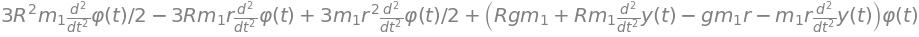

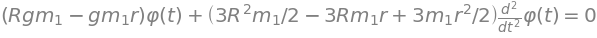

In [14]:
# Végezzünk hasonlót a másik mozgásegyenletünk esetében:

eom2_taylor = eom_φ.subs(φ_csere).series(φ,0,2).removeO().subs(φ_csere_vissza)
display(eom2_taylor)

# Másodrendben kicsi tagunk itt akkor lesz, ha `φ`-t szorozzunk y''-tal.
# Kézzel ezeket a tagokat jelen esetben pl. úgy tudjuk eltüntetni, hogy
# y'' helyére 0-t helyettesítünk:
eom2_lin = sp.Eq(eom2_taylor.subs(q[0].diff(t,2),0).collect(q[1]),0)
eom2_lin

### 2. Feladat

Adjuk meg a mozgásegyenleteket mátrix együtthatós alakban, melynek alakja jelen esetben (disszipatív potenciál, és nem potenciálos aktív erők nélkül):

$$\mathbf{M}\mathbf{\ddot{q}} + \mathbf{K}\mathbf{q} = \mathbf{0}.$$

In [15]:
# Tegyük meg ezt kétféleképpen:

# Elsőnek parciálisan deriváljuk a kinetikus energiát a 2 ált. sebesség szerint,
# majd helyettesítsünk 0-t a helyükre.
# Szintax: egymásba ágyazott 2 db `list comprehension`. Olyan mint 2 egymásba
# ágyazott `for` ciklus. 
M_array = [[T.expand().diff(q1.diff()).diff(q2.diff()).simplify().subs([(q1,0),(q2,0)]) for q1 in q] for q2 in q]

K_array = [[U.expand().diff(q1).diff(q2).simplify().subs([(q1,0),(q2,0)]) for q1 in q] for q2 in q]

M = sp.Matrix(M_array)
K = sp.Matrix(K_array)

display(Math('\mathbf{{M}} = {}'.format(sp.latex(M))))
display(Math('\mathbf{{K}} = {}'.format(sp.latex(K))))

# Ránézve erre a cellára, gondoljuk meg, mennyire egyszerű felírni a mátrix együtthatós
# mozgásegyenletet (2 érdemi sor), ha ismert a kinetikus és a potenciális energia függvénye 
# (+ a disszipatív potenciál, ha releváns), valamint ha nincs nem potenciálos aktív erő (homogén eset). 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
# Másik módszer, a már linearizált mozgásegyenletekből (amit a Lagrange-egyenletekből kaptunk)

# fűzzük őket össze egy vektorba:
eom_12 = sp.Matrix([[eom1_lin.lhs],[eom2_lin.lhs]]) # kell a `left hand side` mert egyenlet alakban vannak
M2 = eom_12.jacobian(q.diff(t,2)) # Jacobi-mátrix az általános gyorsulások szerint
K2 = eom_12.jacobian(q)

display(Math('\mathbf{{M}} = {}'.format(sp.latex(M2))))
display(Math('\mathbf{{K}} = {}'.format(sp.latex(K2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
display(sp.simplify(M-M2))
display(sp.simplify(K-K2))  # Ha nem bíznánk magunkban (:

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

Készítette: 

       Csuzdi Domonkos (Alkalmazott Mechanika Szakosztály) 
       Balogh Tamás (BME MM) kidolgozása alapján.

        Hibák, javaslatok:
        amsz.bme@gmail.com
        csuzdi02@gmail.com

            2021.04.04
        